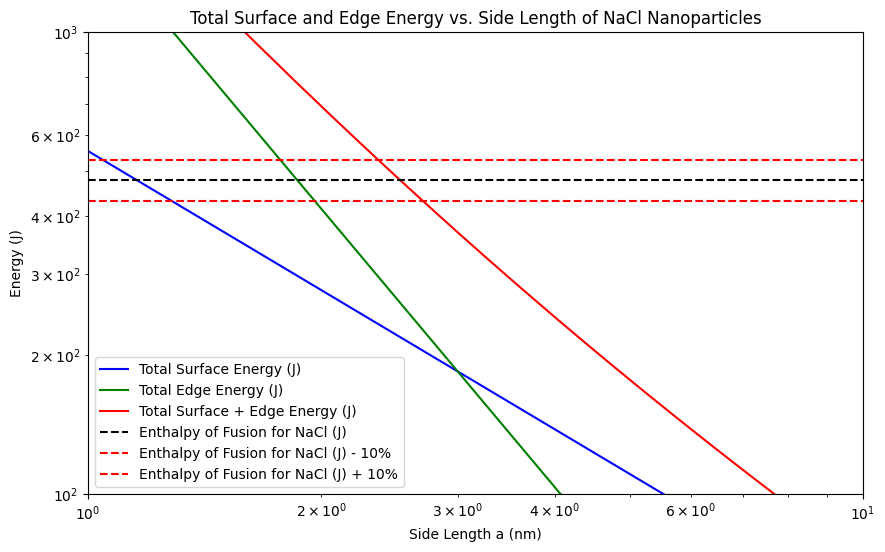

Smallest and largest particle size where energy is comparable to enthalpy of fusion: 2.45 nm to 2.65 nm


In [5]:
#Problem 1a-1c
import numpy as np
import matplotlib.pyplot as plt

# Constants and convert to SI units
gamma = 2e-5  # Surface energy (J/cm^2)
gamma *= 1e4        # Convert to J/m^2
sigma = 3e-12  # Edge energy (J/cm)
sigma *= 1e2        # Convert to J/m
rho_NaCl = 2.17 # Density of NaCl (g/cm^3)
rho_NaCl *= 1e6     # Convert to g/m^3
mass_NaCl = 1  # Mass of NaCl (g)
volume_NaCl = mass_NaCl / rho_NaCl  # Volume of 1 g NaCl (m^3)
enthalpy_fusion_NaCl = 28000  # Enthalpy of fusion for NaCl (J/mol), SICD
enthalpy_fusion_NaCl *= 1/58.4  # Convert to (J/g)

def total_surface_energy(a):
    'Function to calculate total surface energy for a given side length a'
    num_cubes = volume_NaCl / a**3  # Number of cubes
    surface_area = 6*a**2  # Surface area of one cube
    return gamma * surface_area * num_cubes  # Total surface energy (J)

def total_edge_energy(a):
    'Function to calculate total edge energy for a given side length a'
    num_cubes = volume_NaCl / (a**3)  # Number of cubes
    edge_length = 12*a  # Total edge length for one cube
    return edge_length*sigma * num_cubes  # Total edge energy (J)

def total_energy(a):
    'Function to calculate total energy (surface + edge)'
    return total_surface_energy(a) + total_edge_energy(a)

# Side length range (in m)
a_values = np.linspace(5e-11, 1e-6, 5000)

# Calculate energies
surface_energy = total_surface_energy(a_values)
edge_energy = total_edge_energy(a_values)
total_energy_values = total_energy(a_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(a_values * 1e9, surface_energy, label="Total Surface Energy (J)", color='blue')
plt.plot(a_values * 1e9, edge_energy, label="Total Edge Energy (J)", color='green')
plt.plot(a_values * 1e9, total_energy_values, label="Total Surface + Edge Energy (J)", color='red')
plt.axhline(y=enthalpy_fusion_NaCl, color='black', linestyle='--', label="Enthalpy of Fusion for NaCl (J)")

plt.xlim(1,10)
plt.ylim(10**2,10**3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Side Length a (nm)")
plt.ylabel("Energy (J)")
plt.title("Total Surface and Edge Energy vs. Side Length of NaCl Nanoparticles")


# Calculate the acceptable range of energies
lower_bound = enthalpy_fusion_NaCl * 0.9    #10% below
upper_bound = enthalpy_fusion_NaCl * 1.1    #10% above
plt.axhline(y=lower_bound, color='red', linestyle='--', label="Enthalpy of Fusion for NaCl (J) - 10%")
plt.axhline(y=upper_bound, color='red', linestyle='--', label="Enthalpy of Fusion for NaCl (J) + 10%")
plt.legend()
plt.grid()
plt.show()

# Find indices where total energy falls within this range
indices_within_range = np.where((total_energy_values >= lower_bound) & (total_energy_values <= upper_bound))[0]

# Get the smallest and largest particle sizes within this range
a_min_comparable = a_values[indices_within_range[0]]
a_max_comparable = a_values[indices_within_range[-1]]

# Print the results in nanometers (nm)
print(f"Smallest and largest particle size where energy is comparable to enthalpy of fusion: {a_min_comparable * 1e9:.2f} nm to {a_max_comparable * 1e9:.2f} nm")

**Problem 1d**  
If the total energy increases as particle size decreases, it implies that nanoparticles would have a lower melting point compared to bulk NaCl due to the higher surface energy dominating at smaller sizes

**Problem 1e**
- Assume perfect cube shape
- No interactions or any imperfections of the surface

[ 6.44265704 10.42008974 14.46071192 18.52408319 22.59807869 30.76116006]


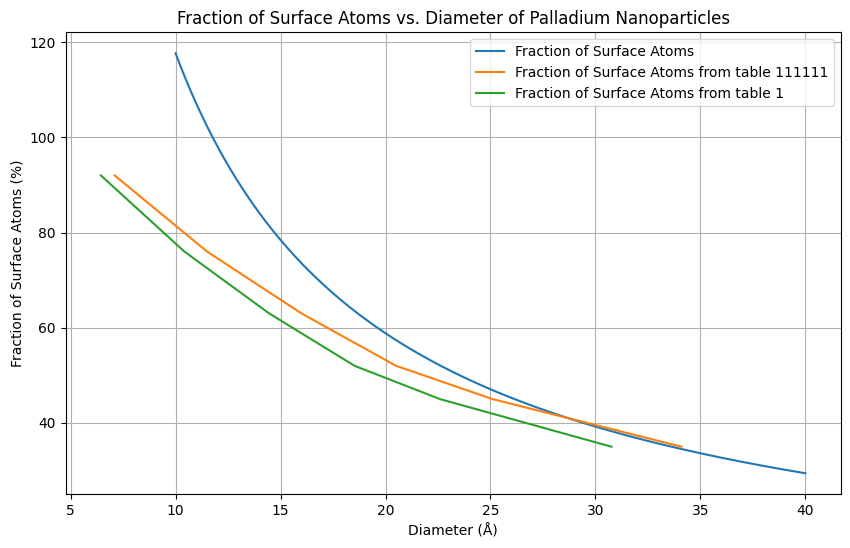

In [3]:
#Problem 1f

#constants 
radius_Pd = 1.37e-10 # Atomic radius Pd (m)
rho_Pd = 12 # Density Pd (g/cm^3)
rho_Pd *= 1e6   # Convert to (g/m^3)
M_m_Pd = 106.4  # Molar mass of Pd (g/mol)
N_A = 6.022e23  # Avogadros constant (1/mol)

def surface_atoms(a):
    'Find the number of atoms on the surface given a diameter a'
    diameter_NP_m = a * 1e-10  # Convert from Å to m
    V_NP = 4/3 * np.pi * (diameter_NP_m / 2)**3  # Volume of the NP (m^3)
    mass = rho_Pd * V_NP  # Mass in grams (g)
    moles = mass / M_m_Pd  # Number of moles (mol)
    total_atoms = moles * N_A  # Total number of atoms
    
    Area_NP = 4 * np.pi * (diameter_NP_m / 2)**2  # Surface area (m^2)
    Area_Pd = (radius_Pd*2)**2
    N_surf = Area_NP / Area_Pd  # Number of surface atoms
    
    return N_surf / total_atoms, total_atoms  # Fraction of surface atoms


a_values = np.linspace(10, 40, 1000)  # Diameter in Ångstrøm
surface_at, total_at = surface_atoms(a_values)

plt.figure(figsize=(10, 6))
plt.plot(a_values, surface_at*100, label='Fraction of Surface Atoms')
plt.xlabel('Diameter (Å)')
plt.ylabel('Fraction of Surface Atoms (%)')
plt.title('Fraction of Surface Atoms vs. Diameter of Palladium Nanoparticles')


#Problem 1h
list_total_atoms = np.array([13,55,147,309,561,1415])
list_surface_atoms = [92,76,63,52,45,35]    #in percent (%)
diameters = (2 * radius_Pd) * (list_total_atoms**(1/3)) * 1e10  # in Ångström
print(diameters)

plt.plot([7.1,11.5,16.0,20.5,25.1,34.1], list_surface_atoms, label='Fraction of Surface Atoms from table 111111')
plt.plot(diameters, list_surface_atoms, label='Fraction of Surface Atoms from table 1')
plt.legend()
plt.grid()
plt.show()

**Problem 1g** 
The lower limit that makes sense is when 100% of the atoms are surface atoms, which in this case seems to be at a diameter of 11.5 Å  

**Problem 1h** 
When there are 50% surface atoms or more, one could say that this is a significant number of surface atoms.


To find the diameters, i used the volume $V$ of a sphere with diameter $D$ which is given by:
$$V = \frac{4}{3} \pi \left(\frac{D}{2}\right)^3$$



**Problem 2a**  
As the NP is smaller, the surface-volume have an increased effect, since the ratio of surface atoms will increase, and therefore the dangling bonds at the surface will force the atom towards the center.

**Problem 2b**  
- Rearrangement of surface atoms to reduce number of unsatisfied bonds
- Adsorption of atoms, such as oxygen or hydrogen to satisfy bonds
- Surface relaxation